######## Description of file function

In [1]:
######## Import libraries
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
##### display settings
pd.set_option('display.max_columns', None)


We will divide working with notebook into two seperate explortations. First of all I will focus on exploration and investigation of atp matches in the main draw of the tournament, as this is main object of interest.

At the latter steps we will investig

# exploration of data


#### verification if files have the same column names, letting them to be unioned

###### atp_matches columns convergence check

In [3]:
df = pd.read_csv('results/atp_matches_1968.csv')

In [4]:
list_of_colums = list(df.columns)

In [5]:
for file in range(1969,2025):
    examined_year = pd.read_csv(f"results/atp_matches_{file}.csv")
    if list_of_colums == list(examined_year.columns):
        pass
    else:
        print(f"Year = {file} - have different columns")

In [6]:
# each file have the same structure

In [7]:
###### atp_matches columns convergence check with qualification and challenger matches

In [8]:
for file in range(1978,2025):
    examined_year = pd.read_csv(f"results/atp_matches_qual_chall_{file}.csv")
    if list_of_colums == list(examined_year.columns):
        pass
    else:
        print(f"Year = {file} - have different columns")

In [9]:
# each file have the same structure

In [10]:
###### creation of 2 table with all historical records. One table for main draw and the second for quallification and challangers

In [11]:
df_main_draw = pd.read_csv('results/atp_matches_1968.csv')
df_main_draw['season'] = 1968
df_main_draw['draw'] = 'main'

for file in range(1969,2025):
    df_next_year = pd.read_csv(f"results/atp_matches_{file}.csv")
    df_next_year['season'] = file
    df_next_year['draw'] = 'main'
    df_main_draw = pd.concat([df_main_draw, df_next_year], ignore_index=True, sort=False)
    
df_main_draw


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,season,draw
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,Doug Smith,U,NaN,AUS,NaN,110196,NaN,NaN,Peter Ledbetter,U,NaN,IRL,24.0,6-1 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,main
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,Louis Pretorius,R,NaN,RSA,NaN,209536,NaN,NaN,Maurice Pollock,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,main
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,Cecil Pedlow,U,NaN,IRL,NaN,209535,NaN,NaN,John Mulvey,U,NaN,IRL,NaN,6-2 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,main
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,Tom Okker,R,178.0,NED,24.3,209534,NaN,NaN,Unknown Fearmon,U,NaN,NaN,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,main
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,Armistead Neely,R,NaN,USA,21.3,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194991,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4.0,D,20240203,5,212051,NaN,NaN,Joaquin Aguilar Cardozo,U,NaN,URU,18.8,209943,NaN,NaN,Ilya Snitari,R,188.0,MDA,21.8,6-1 6-0,3,RR,77.0,0.0,0.0,36.0,22.0,15.0,10.0,7.0,1.0,1.0,1.0,1.0,61.0,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0,2024,main
194992,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,1,122533,NaN,NaN,Nam Hoang Ly,R,175.0,VIE,26.9,202475,NaN,NaN,Philip Henning,R,NaN,RSA,23.2,6-3 6-4,3,RR,131.0,1.0,1.0,86.0,60.0,40.0,13.0,10.0,8.0,9.0,2.0,1.0,56.0,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0,2024,main
194993,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,2,144748,NaN,NaN,Kris Van Wyk,R,185.0,RSA,27.3,144775,NaN,NaN,Linh Giang Trinh,R,183.0,VIE,26.4,4-6 6-3 4-0,3,RR,131.0,4.0,2.0,76.0,46.0,32.0,10.0,12.0,6.0,11.0,0.0,2.0,71.0,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN,2024,main
194994,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4.0,D,20240202,4,122533,NaN,NaN,Nam Hoang Ly,R,175.0,VIE,26.9,144748,NaN,NaN,Kris Van Wyk,R,185.0,RSA,27.3,6-4 3-6 6-3,3,RR,159.0,0.0,1.0,84.0,61.0,41.0,13.0,14.0,2.0,5.0,5.0,3.0,86.0,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0,2024,main


In [12]:
df_chall_quall= pd.read_csv('results/atp_matches_qual_chall_1978.csv')
df_chall_quall['season'] = 1978
df_chall_quall['draw'] = 'rest'

for file in range(1978,2025):
    df_next_year_chall_quall = pd.read_csv(f"results/atp_matches_qual_chall_{file}.csv")
    df_next_year_chall_quall['season'] = file
    df_next_year_chall_quall['draw'] = 'rest'
    df_chall_quall = pd.concat([df_chall_quall, df_next_year_chall_quall], ignore_index=True, sort=False)
    
df_chall_quall


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,season,draw
0,1978-301,Auckland CH,Hard,32,C,19780108,270,100373,NaN,NaN,Christopher Sylvan,R,NaN,USA,22.8,107618,NaN,NaN,Malcolm Elley,R,NaN,NZL,NaN,6-1 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.0,NaN,NaN,NaN,1978,rest
1,1978-301,Auckland CH,Hard,32,C,19780108,271,109807,NaN,NaN,Garry Slater,R,NaN,NZL,NaN,109808,NaN,NaN,Graham Oliver,U,NaN,NZL,NaN,6-4 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978,rest
2,1978-301,Auckland CH,Hard,32,C,19780108,272,109810,NaN,NaN,Dave Simmonds,U,NaN,NZL,NaN,208999,NaN,NaN,G Dingwell,U,NaN,UNK,NaN,6-2 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978,rest
3,1978-301,Auckland CH,Hard,32,C,19780108,273,100638,NaN,NaN,David Mustard,L,180.0,NZL,18.0,107985,NaN,NaN,Peter Langsford,R,NaN,AUS,23.6,7-5 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0,NaN,1978,rest
4,1978-301,Auckland CH,Hard,32,C,19780108,274,107301,NaN,NaN,Jay Harvey,R,NaN,AUS,NaN,100316,NaN,NaN,Scott Carnahan,R,NaN,USA,24.2,6-4 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.0,NaN,1978,rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224100,2024-8268,Yokkaichi CH,Hard,32,C,20241125,342,122352,4.0,NaN,Christoph Negritu,R,193.0,GER,30.6,206923,NaN,PR,Shinji Hazawa,R,175.0,JPN,25.6,7-5 6-3,3,Q1,95.0,5.0,1.0,68.0,39.0,25.0,19.0,11.0,3.0,5.0,0.0,0.0,73.0,54.0,29.0,9.0,10.0,5.0,9.0,409.0,113.0,1073.0,11.0,2024,rest
224101,2024-8268,Yokkaichi CH,Hard,32,C,20241125,341,207987,9.0,NaN,Ryuki Matsuda,R,157.0,JPN,24.9,200665,NaN,PR,Yuta Kawahashi,R,175.0,JPN,26.8,6-4 6-0,3,Q1,69.0,1.0,0.0,51.0,28.0,20.0,16.0,8.0,5.0,5.0,0.0,1.0,54.0,31.0,16.0,10.0,8.0,4.0,8.0,507.0,76.0,860.0,22.0,2024,rest
224102,2024-8268,Yokkaichi CH,Hard,32,C,20241125,340,209951,5.0,NaN,Petr Bar Biryukov,L,196.0,RUS,22.7,202356,NaN,NaN,Tsung Hao Huang,R,173.0,TPE,25.0,6-4 6-3,3,Q1,67.0,4.0,2.0,62.0,35.0,28.0,7.0,9.0,5.0,8.0,0.0,5.0,66.0,41.0,22.0,8.0,10.0,4.0,10.0,429.0,100.0,708.0,40.0,2024,rest
224103,2024-8268,Yokkaichi CH,Hard,32,C,20241125,338,202113,6.0,NaN,Hikaru Shiraishi,R,168.0,JPN,24.5,211627,NaN,Alt,Hayato Matsuoka,R,180.0,JPN,19.8,7-6(6) 3-6 6-4,3,Q1,180.0,1.0,2.0,93.0,53.0,29.0,22.0,15.0,2.0,7.0,2.0,1.0,117.0,68.0,41.0,23.0,16.0,7.0,12.0,528.0,71.0,894.0,20.0,2024,rest


In [13]:
##### Data cleaning of table df_main_draw

In [14]:
# I want to see only singles matches
# Deletion of Davis Cup matched


In [15]:
df_main_draw = df_main_draw[df_main_draw['tourney_level'] !='D']

In [39]:
# during last decades the naming of grand slamd tournaments differed. Here I am going to bring it to standarized name.
grand_slams_normalization = {
    'Australian Chps.': 'Australian Open',
    'Australian Open-2': 'Australian Open',
    'Us Open': 'US Open'
}
df_main_draw['tourney_name'].replace(grand_slams_normalization, inplace=True)


C:\Users\Maciek\AppData\Local\Temp\ipykernel_27644\2317766650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_draw['tourney_name'].replace(grand_slams_normalization, inplace=True)


In [17]:
# changing date format from float to integer
df_main_draw.loc[:,'draw_size'] = df_main_draw['draw_size'].astype('Int64')
df_main_draw.loc[:,'winner_seed'] = df_main_draw['winner_seed'].astype('Int64')
df_main_draw.loc[:,'winner_ht'] = df_main_draw['winner_ht'].astype('Int64')
df_main_draw.loc[:,'loser_seed'] = df_main_draw['loser_seed'].astype('Int64')
df_main_draw.loc[:,'loser_ht'] = df_main_draw['loser_ht'].astype('Int64')
df_main_draw.loc[:,'minutes'] = df_main_draw['minutes'].astype('Int64')
df_main_draw.loc[:,'w_ace'] = df_main_draw['w_ace'].astype('Int64')
df_main_draw.loc[:,'w_df'] = df_main_draw['w_df'].astype('Int64')
df_main_draw.loc[:,'w_svpt'] = df_main_draw['w_svpt'].astype('Int64')
df_main_draw.loc[:,'w_1stIn'] = df_main_draw['w_1stIn'].astype('Int64')
df_main_draw.loc[:,'w_1stWon'] = df_main_draw['w_1stWon'].astype('Int64')
df_main_draw.loc[:,'w_2ndWon'] = df_main_draw['w_2ndWon'].astype('Int64')
df_main_draw.loc[:,'w_SvGms'] = df_main_draw['w_SvGms'].astype('Int64')
df_main_draw.loc[:,'w_bpSaved'] = df_main_draw['w_bpSaved'].astype('Int64')
df_main_draw.loc[:,'w_bpFaced'] = df_main_draw['w_bpFaced'].astype('Int64')
df_main_draw.loc[:,'l_ace'] = df_main_draw['l_ace'].astype('Int64')
df_main_draw.loc[:,'l_df'] = df_main_draw['l_df'].astype('Int64')
df_main_draw.loc[:,'l_svpt'] = df_main_draw['l_svpt'].astype('Int64')
df_main_draw.loc[:,'l_1stIn'] = df_main_draw['l_1stIn'].astype('Int64')
df_main_draw.loc[:,'l_1stWon'] = df_main_draw['l_1stWon'].astype('Int64')
df_main_draw.loc[:,'l_2ndWon'] = df_main_draw['l_2ndWon'].astype('Int64')
df_main_draw.loc[:,'l_SvGms'] = df_main_draw['l_SvGms'].astype('Int64')
df_main_draw.loc[:,'l_bpSaved'] = df_main_draw['l_bpSaved'].astype('Int64')
df_main_draw.loc[:,'l_bpFaced'] = df_main_draw['l_bpFaced'].astype('Int64')
df_main_draw.loc[:,'winner_rank'] = df_main_draw['winner_rank'].astype('Int64')
df_main_draw.loc[:,'winner_rank_points'] = df_main_draw['winner_rank_points'].astype('Int64')
df_main_draw.loc[:,'loser_rank'] = df_main_draw['loser_rank'].astype('Int64')
df_main_draw.loc[:,'loser_rank_points'] = df_main_draw['loser_rank_points'].astype('Int64')
df_main_draw


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,season,draw
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,<NA>,NaN,Doug Smith,U,<NA>,AUS,NaN,110196,<NA>,NaN,Peter Ledbetter,U,<NA>,IRL,24.0,6-1 7-5,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,<NA>,NaN,Louis Pretorius,R,<NA>,RSA,NaN,209536,<NA>,NaN,Maurice Pollock,U,<NA>,IRL,NaN,6-1 6-1,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,<NA>,NaN,Cecil Pedlow,U,<NA>,IRL,NaN,209535,<NA>,NaN,John Mulvey,U,<NA>,IRL,NaN,6-2 6-2,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,<NA>,NaN,Tom Okker,R,178,NED,24.3,209534,<NA>,NaN,Unknown Fearmon,U,<NA>,NaN,NaN,6-1 6-1,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,<NA>,NaN,Armistead Neely,R,<NA>,USA,21.3,209533,<NA>,NaN,Harry Sheridan,U,<NA>,IRL,NaN,6-2 6-4,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194731,2024-7696,Next Gen Finals,Hard,8,F,20241218,390,210506,2,NaN,Alex Michelsen,R,193,USA,20.3,209414,6,NaN,Luca Van Assche,R,178,FRA,20.5,1-4 4-2 4-3(6) 4-3(5),5,RR,102,6,0,81,55,39,14,12,3,6,4,3,71,48,31,15,11,1,3,41,1245,128,471,2024,main
194732,2024-7696,Next Gen Finals,Hard,8,F,20241218,389,210506,2,NaN,Alex Michelsen,R,193,USA,20.3,210460,7,NaN,Nishesh Basavareddy,R,180,USA,19.6,2-4 4-3(5) 4-3(4) 4-2,5,RR,112,9,4,79,47,39,12,12,2,5,3,4,76,48,35,15,12,4,7,41,1245,138,440,2024,main
194733,2024-7696,Next Gen Finals,Hard,8,F,20241218,388,209414,6,NaN,Luca Van Assche,R,178,FRA,20.5,209992,4,NaN,Juncheng Shang,L,180,CHN,19.8,4-3(3) 2-4 4-1 4-3(5),5,RR,116,8,1,76,57,39,11,12,2,4,7,3,78,50,35,9,11,11,13,128,471,50,1115,2024,main
194734,2024-7696,Next Gen Finals,Hard,8,F,20241218,387,210460,7,NaN,Nishesh Basavareddy,R,180,USA,19.6,209992,4,NaN,Juncheng Shang,L,180,CHN,19.8,3-4(4) 4-2 4-2 4-1,5,RR,93,14,2,64,45,35,9,11,5,6,6,3,78,44,27,18,12,6,11,138,440,50,1115,2024,main


In [18]:
df_main_draw.loc[:,'tourney_date'] = pd.to_datetime(df_main_draw['tourney_date'].astype('str'), format='%Y%m%d').dt.date

In [19]:
df_main_draw

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,season,draw
0,1968-2029,Dublin,Grass,32,A,1968-07-08,270,112411,<NA>,NaN,Doug Smith,U,<NA>,AUS,NaN,110196,<NA>,NaN,Peter Ledbetter,U,<NA>,IRL,24.0,6-1 7-5,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
1,1968-2029,Dublin,Grass,32,A,1968-07-08,271,126914,<NA>,NaN,Louis Pretorius,R,<NA>,RSA,NaN,209536,<NA>,NaN,Maurice Pollock,U,<NA>,IRL,NaN,6-1 6-1,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
2,1968-2029,Dublin,Grass,32,A,1968-07-08,272,209523,<NA>,NaN,Cecil Pedlow,U,<NA>,IRL,NaN,209535,<NA>,NaN,John Mulvey,U,<NA>,IRL,NaN,6-2 6-2,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
3,1968-2029,Dublin,Grass,32,A,1968-07-08,273,100084,<NA>,NaN,Tom Okker,R,178,NED,24.3,209534,<NA>,NaN,Unknown Fearmon,U,<NA>,NaN,NaN,6-1 6-1,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
4,1968-2029,Dublin,Grass,32,A,1968-07-08,274,100132,<NA>,NaN,Armistead Neely,R,<NA>,USA,21.3,209533,<NA>,NaN,Harry Sheridan,U,<NA>,IRL,NaN,6-2 6-4,3,R32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1968,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194731,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,390,210506,2,NaN,Alex Michelsen,R,193,USA,20.3,209414,6,NaN,Luca Van Assche,R,178,FRA,20.5,1-4 4-2 4-3(6) 4-3(5),5,RR,102,6,0,81,55,39,14,12,3,6,4,3,71,48,31,15,11,1,3,41,1245,128,471,2024,main
194732,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,389,210506,2,NaN,Alex Michelsen,R,193,USA,20.3,210460,7,NaN,Nishesh Basavareddy,R,180,USA,19.6,2-4 4-3(5) 4-3(4) 4-2,5,RR,112,9,4,79,47,39,12,12,2,5,3,4,76,48,35,15,12,4,7,41,1245,138,440,2024,main
194733,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,388,209414,6,NaN,Luca Van Assche,R,178,FRA,20.5,209992,4,NaN,Juncheng Shang,L,180,CHN,19.8,4-3(3) 2-4 4-1 4-3(5),5,RR,116,8,1,76,57,39,11,12,2,4,7,3,78,50,35,9,11,11,13,128,471,50,1115,2024,main
194734,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,387,210460,7,NaN,Nishesh Basavareddy,R,180,USA,19.6,209992,4,NaN,Juncheng Shang,L,180,CHN,19.8,3-4(4) 4-2 4-2 4-1,5,RR,93,14,2,64,45,35,9,11,5,6,6,3,78,44,27,18,12,6,11,138,440,50,1115,2024,main


In [20]:
df_gs_winners = df_main_draw[(df_main_draw['tourney_level'] =='G') & (df_main_draw['round'] =='F')]

In [21]:
df_gs_winners.loc[:,'counter'] = 1
df_gs_winners = df_gs_winners[['tourney_name','winner_name', 'counter']]

C:\Users\Maciek\AppData\Local\Temp\ipykernel_27644\4141931433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs_winners.loc[:,'counter'] = 1


In [22]:
df_gs_winners.groupby(by=['tourney_name','winner_name'], as_index = False).sum('counter')

,tourney_name,winner_name,counter
0,Australian Chps.,Bill Bowrey,1
1,Australian Open,Andre Agassi,4
2,Australian Open,Arthur Ashe,1
3,Australian Open,Boris Becker,2
4,Australian Open,Brian Teacher,1
...,...,...,...
105,Wimbledon,Richard Krajicek,1
106,Wimbledon,Rod Laver,2
107,Wimbledon,Roger Federer,8
108,Wimbledon,Stan Smith,1


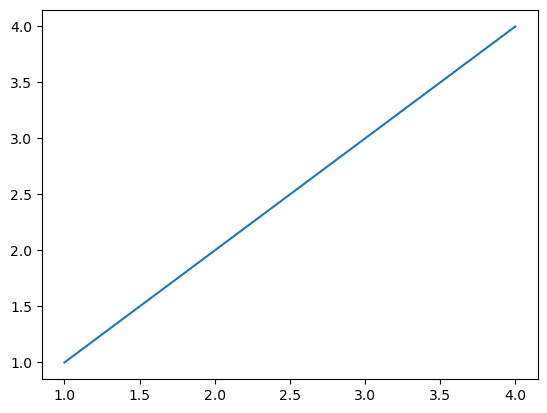

In [23]:
fig,ax = plt.subplots()
ax.plot([1,2,3,4],[1,2,3,4])
plt.show()

In [ ]:
plt.bar()

In [38]:
df_main_draw[df_main_draw['tourney_level']=='G']['tourney_name'].unique()

array(['Roland Garros', 'Wimbledon', 'US Open', 'Australian Open'],
      dtype=object)

In [34]:
df_main_draw[df_main_draw['tourney_name']== 'Australian Chps.']

#Us Open
#Australian Open-2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,season,draw
37893,1977-581,Australian Open-2,Grass,64,G,1977-12-19,1,100342,1,NaN,Vitas Gerulaitis,R,183,USA,23.4,100293,<NA>,NaN,John Marks,R,<NA>,AUS,25.0,7-6 6-0 6-1,5,R64,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,<NA>,<NA>,<NA>,1977,main
37894,1977-581,Australian Open-2,Grass,64,G,1977-12-19,2,100551,<NA>,Q,Brad Drewett,L,185,AUS,19.4,100285,<NA>,Q,Rod Frawley,R,185,AUS,25.2,7-6 6-2 6-7 2-6 6-2,5,R64,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1977,main
37895,1977-581,Australian Open-2,Grass,64,G,1977-12-19,3,100208,<NA>,NaN,Dick Bohrnstedt,R,<NA>,USA,27.6,100135,<NA>,NaN,Onny Parun,R,188,NZL,30.6,6-2 6-4 6-7 6-4,5,R64,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1977,main
37896,1977-581,Australian Open-2,Grass,64,G,1977-12-19,4,100236,<NA>,NaN,John James,R,183,AUS,26.7,100158,<NA>,NaN,John Bartlett,R,188,AUS,29.7,6-0 6-3 1-6 6-2,5,R64,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1977,main
37897,1977-581,Australian Open-2,Grass,64,G,1977-12-19,5,100356,<NA>,NaN,Paul Mcnamee,R,178,AUS,23.1,100273,<NA>,NaN,Kim Warwick,R,183,AUS,25.6,7-5 6-7 7-6 7-5,5,R64,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,84,<NA>,42,<NA>,1977,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37951,1977-581,Australian Open-2,Grass,64,G,1977-12-19,59,100343,<NA>,NaN,John Lloyd,R,178,GBR,23.3,100087,<NA>,NaN,John Newcombe,R,183,AUS,33.5,3-6 6-3 7-5 7-5,5,QF,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,49,<NA>,<NA>,<NA>,1977,main
37952,1977-581,Australian Open-2,Grass,64,G,1977-12-19,60,100178,<NA>,Q,Bob Giltinan,R,<NA>,AUS,28.7,100287,<NA>,NaN,Robin Drysdale,R,<NA>,GBR,25.2,6-4 6-4 3-6 7-6,5,QF,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1977,main
37953,1977-581,Australian Open-2,Grass,64,G,1977-12-19,61,100342,1,NaN,Vitas Gerulaitis,R,183,USA,23.4,100244,6,NaN,John Alexander,R,190,AUS,26.4,6-1 6-2 6-4,5,SF,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5,<NA>,21,<NA>,1977,main
37954,1977-581,Australian Open-2,Grass,64,G,1977-12-19,62,100343,<NA>,NaN,John Lloyd,R,178,GBR,23.3,100178,<NA>,Q,Bob Giltinan,R,<NA>,AUS,28.7,6-4 6-2 6-0,5,SF,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,49,<NA>,<NA>,<NA>,1977,main
